In [1]:
import pandas as pd 
import numpy as np 
import geopandas as gpd 

import os 
import matplotlib.pyplot as plt

In [44]:
import geopandas as gpd
import fiona

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
df = gpd.read_file('congestion_pricing.kml', driver='KML')

In [50]:
land_use = pd.read_csv('land_use.csv', index_col = 'TAZ')
tazs = gpd.read_file('../tmp/taz_sfbay.shp')
tazs['zone_id'] = tazs['zone_id'].astype(int)

In [51]:
congestion_pricing_zones = gpd.sjoin(tazs, df, how = 'inner', predicate = 'intersects')

<AxesSubplot:>

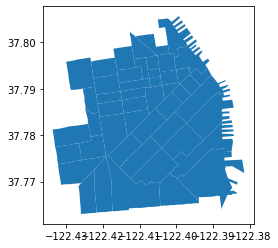

In [52]:
congestion_pricing_zones.plot()

In [57]:
cp_tazs = list(congestion_pricing_zones.zone_id)

In [70]:
tazs['congestion_pricing'] = tazs['zone_id'].isin(cp_tazs)
tazs['congestion_pricing'] = tazs['congestion_pricing'].replace({True:'Congestion Pricing Zone', False: 'Other TAZs'})

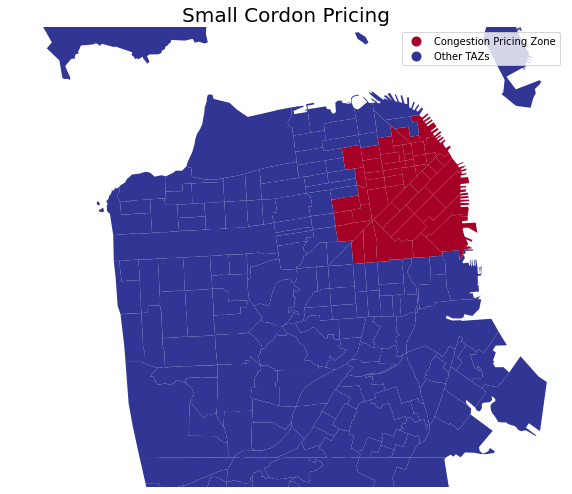

In [73]:
ax = tazs.plot(figsize = (10,10), column = 'congestion_pricing', categorical = True, legend = True, cmap = 'RdYlBu')
plt.xlim((-122.55, -122.35))
plt.ylim((37.7, 37.83))
ax.set_axis_off()
ax.set_title('Small Cordon Pricing', fontsize = 20);

In [74]:
cp_tazs

[1,
 3,
 5,
 12,
 13,
 15,
 18,
 20,
 23,
 2,
 4,
 10,
 11,
 14,
 16,
 17,
 19,
 21,
 22,
 108,
 109,
 110,
 37,
 35,
 33,
 28,
 25,
 24,
 29,
 6,
 30,
 8,
 46,
 75,
 36,
 32,
 27,
 26,
 31,
 7,
 9,
 78,
 80,
 107,
 76,
 79,
 81,
 106,
 105]